In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
egov = pd.read_csv('EGOV_DATA_2024.csv')

In [3]:
egov = egov.sort_values(by='Country Name', ascending=True).reset_index(drop=True)

In [4]:
gastos_publicos = pd.read_excel('imf_government_expenditure.xls')

In [5]:
gastos_publicos = gastos_publicos.sort_values(by='Country', ascending=True).reset_index(drop=True)

In [6]:
set(gastos_publicos['Country']).difference(egov['Country Name'])

{'Aruba',
 "China, People's Republic of",
 'Georgia',
 'Hong Kong SAR',
 'Iran',
 'Korea, Republic of',
 'Kyrgyz Republic',
 'Micronesia, Fed. States of',
 'Moldova',
 'Republic of Congo',
 'Slovak Republic',
 'Tanzania',
 'Türkiye, Republic of',
 'United Kingdom',
 'United States',
 'Vietnam'}

In [7]:
gastos_publicos['Country'] = gastos_publicos['Country'].replace({
    "China, People's Republic of": 'China',
    'Georgia': 'Georgia (Country)',
    'Iran': 'Iran (Islamic Republic of)',
    'Korea, Republic of': 'Republic of Korea',
    'Micronesia, Fed. States of': 'Micronesia (Federated States of)',
    'Moldova': 'Republic of Moldova',
    'Republic of Congo': 'Congo',
    'Slovak Republic': 'Slovakia',
    'Tanzania': 'United Republic of Tanzania',
    'Türkiye, Republic of': 'Türkiye',
    'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
    "United States": "United States of America",
    'Vietnam': 'Viet Nam',
    'Kyrgyz Republic': 'Kyrgyzstan'
})

In [8]:
set(gastos_publicos['Country']).difference(egov['Country Name'])

{'Aruba', 'Hong Kong SAR'}

In [9]:
paises = gastos_publicos['Country'].unique().tolist()

In [10]:
egov = egov[egov['Country Name'].isin(paises)].reset_index(drop=True)

In [11]:
gastos_publicos.loc[gastos_publicos['Country'].isin(['Aruba', 'Hong Kong SAR'])]

,Country,Percentage
5,Aruba,21.678768
63,Hong Kong SAR,28.293314


In [12]:
gastos_publicos = gastos_publicos.drop(index=[5, 63]).reset_index(drop=True)

In [13]:
df = pd.DataFrame()

In [14]:
df['Online Service Index'] = egov['Online Service Index']

In [15]:
df['Gastos públicos (% do PIB)'] = gastos_publicos['Percentage']

In [16]:
df['Gastos públicos (% do PIB)'] = df['Gastos públicos (% do PIB)']

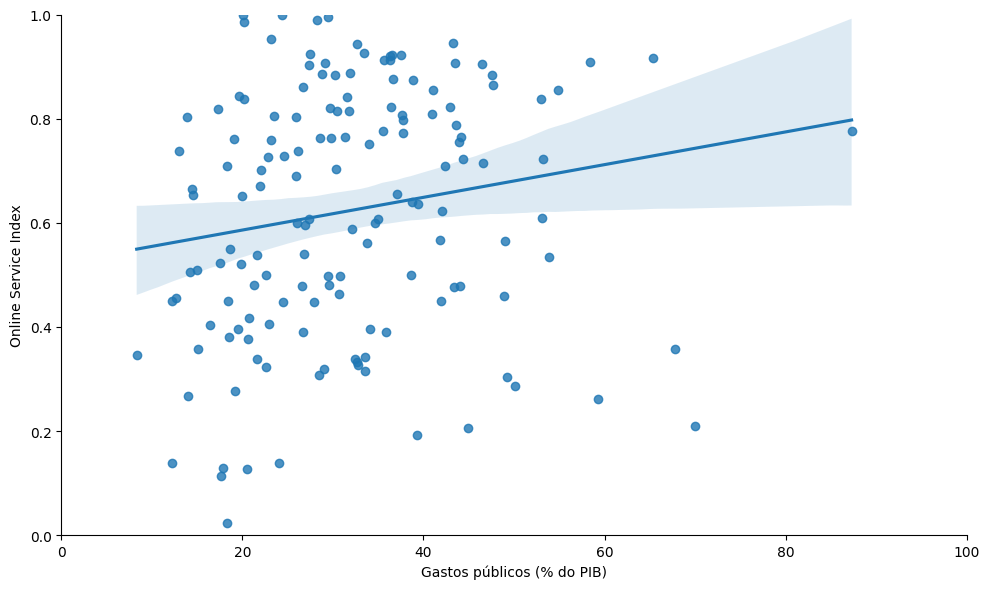

In [17]:
plt.figure(figsize=(10, 6))

sns.regplot(df, x='Gastos públicos (% do PIB)', y='Online Service Index')

sns.despine()
plt.xlim(0, 100)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [18]:
df.corr(method='spearman')

,Online Service Index,Gastos públicos (% do PIB)
Online Service Index,1.000000,0.219782
Gastos públicos (% do PIB),0.219782,1.000000
